### 목표 설정
- 폐암 데이터를 활용해서 이진 분류 신경망 구현
- 이진 분류 개념을 이해한다.

In [2]:
# 드라이브 마운트(연동)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/딥러닝

/content/drive/MyDrive/Colab Notebooks/딥러닝


In [4]:
!pwd

/content/drive/MyDrive/Colab Notebooks/딥러닝


In [5]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# 데이터 불러오기
data = pd.read_csv('data/ThoraricSurgery.csv', header = None)
data
# 컬럼명이 삭제되어서 0번 인덱스가 컬럼명으로 올라갔다 -> header=None

# 현재 데이터는 컬럼명이 별도로 존재하지 않는다.
# 이 상태로 데이터를 불러오면 첫번째 행이 컬럼 명으로 불러와진다.
# header 옵션을 사용해서 새로 불러와보자
# header : 데이터를 불러오면서 컬럼명을 설정해주는 키워드
# (None)으로 설정한 경우 : 인덱스 번호가 컬럼명으로 출력된다.
# 데이터 정보 : 0 ~ 16 컬럼 -> 속성(특성) : 종양 유형, 폐활량, 고통정도 등등
# 17번 컬럼 : 정답 클래스(수술 후 생존 결과) - 0(사망) / 1(생존)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,98,6,3.04,2.40,2,0,0,0,1,0,11,0,0,0,1,0,76,0
466,369,6,3.88,2.72,1,0,0,0,1,0,12,0,0,0,1,0,77,0
467,406,6,5.36,3.96,1,0,0,0,1,0,12,0,0,0,0,0,62,0
468,25,8,4.32,3.20,0,0,0,0,0,0,11,0,0,0,0,0,58,1


In [7]:
data.info()
# 결측치 없다!
# Dtype : 정수와 실수로 이루어져 있다 -> 인코딩 필요 없다!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       470 non-null    int64  
 1   1       470 non-null    int64  
 2   2       470 non-null    float64
 3   3       470 non-null    float64
 4   4       470 non-null    int64  
 5   5       470 non-null    int64  
 6   6       470 non-null    int64  
 7   7       470 non-null    int64  
 8   8       470 non-null    int64  
 9   9       470 non-null    int64  
 10  10      470 non-null    int64  
 11  11      470 non-null    int64  
 12  12      470 non-null    int64  
 13  13      470 non-null    int64  
 14  14      470 non-null    int64  
 15  15      470 non-null    int64  
 16  16      470 non-null    int64  
 17  17      470 non-null    int64  
dtypes: float64(2), int64(16)
memory usage: 66.2 KB


### 데이터 분리
1. 문제 데이터 / 정답 데이터 분리
2. 훈련 데이터와 평가 데이터 분리

In [8]:
# 1. 문제 데이터와 정답 데이터로 분리 (iloc)
X = data.iloc[:, :17]   # X = data.iloc[:, :-1]
y = data[17]
y

0      0
1      0
2      1
3      1
4      0
      ..
465    0
466    0
467    0
468    1
469    0
Name: 17, Length: 470, dtype: int64

In [9]:
# 데이터 체크(shape)
X.shape, y.shape

((470, 17), (470,))

In [10]:
# 훈련셋과 평가셋으로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state=30)

In [11]:
# 데이터 체크(shape)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((329, 17), (141, 17), (329,), (141,))

### 신경망 구축
1. 신경망 구조 설계
2. 학습/평가 방법 설정
3. 학습 + 시각화
4. 모델 평가

In [12]:
# 재료 import
# 뼈대를 구성하는 재료
# 층 구성 재료
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
# 모델 구축 시작
# 뼈대 설정
model = Sequential()

# 입력층 설정
# 뉴런의 개수 = 10 / 데이터 입력 특성 개수 = ? / sigmoid 함수 사용
model.add(Dense(units=10, input_dim=17, activation='sigmoid'))

# 중간층 설정 -> 입력층에서 결과를 넘겨주기 때문에 input_dim 생략 가능
# 뉴런의 개수 = 6 / 시그모이드 함수
model.add(Dense(units=6, activation='sigmoid'))

# 뉴런의 개수 = 4 / 시그모이드 함수
model.add(Dense(units=4, activation='sigmoid'))

# 출력층 설정
# 뉴런의 개수 = 1 / 시그모이드 함수
model.add(Dense(units=1, activation='sigmoid'))
# 현재 우리가 진행하는 분석 방법은 어떤 방법인가? > 분류 > 이진 분류
# 출력층의 구조는 우리가 예측하는 분석 방법에 따라 구조가 달라진다.
# 이진 분류에서는 활성화 함수 sigmoid / 뉴런의 개수 1개 사용
# 회귀 분석에서는 활성화 함수 생략 / 뉴런의 개수 1개 사용

# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                180       
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dense_2 (Dense)             (None, 4)                 28        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 279 (1.09 KB)
Trainable params: 279 (1.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### activation(활성화 함수) : 자극에 대한 반응 여부를 결정
- 회귀 : linear -> 신경망에서 도출된 수치값(결과값)을 그대로 예측값으로 사용
- 분류 :  
  - 딥러닝은 선형 모델 기반이다.
  - 도출된 수치값은 연속된 실수 -> 분류예측 어려움
  - 이를 해결하기 위해 분류할 수 있는 형태로 변경 (활성화 함수 도입)
  - 이진 분류 문제에서는 출력층에 활성화 함수를 sigmoid 함수로 사용한다. (0 / 1 분류, 0.5라는 기준값을 가지고 높은지 낮은지 확률 정보를 바탕으로 최종 출력을 결정)

In [16]:
# 3. 모델 학습
h = model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
11/11 [==============================] - 1s 4ms/step - loss: 0.6362 - accuracy: 0.8480
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6109 - accuracy: 0.8480
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 0.5885 - accuracy: 0.8480
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 0.5697 - accuracy: 0.8480
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 0.5533 - accuracy: 0.8480
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 0.5381 - accuracy: 0.8480
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 0.5257 - accuracy: 0.8480
Epoch 8/100
11/11 [==============================] - 0s 4ms/step - loss: 0.5148 - accuracy: 0.8480
Epoch 9/100
11/11 [==============================] - 0s 4ms/step - loss: 0.5053 - accuracy: 0.8480
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4962 - accuracy: 0.8480
Epoch 11/

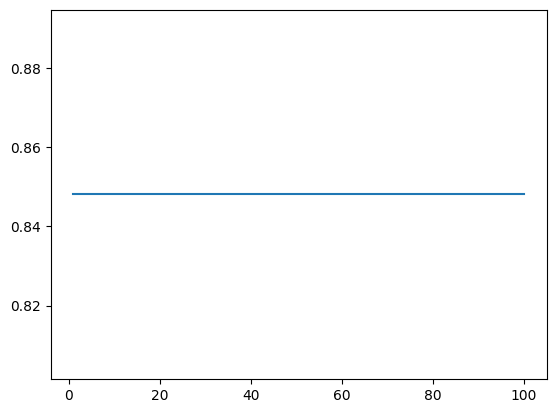

In [17]:
# 모델 학습 시각화
plt.plot(range(1,101), h.history['accuracy'])
plt.show()

In [18]:
# 모델 평가
model.evaluate(X_test, y_test)
# 에러값과 성능(accuracy) 두 개가 나왔다

5/5 [==============================] - 0s 5ms/step - loss: 0.4090 - accuracy: 0.8582


[0.40896034240722656, 0.8581560254096985]

In [19]:
# 모델 예측
pre = model.predict(X_test)
pre

5/5 [==============================] - 0s 3ms/step


array([[0.15305768],
       [0.15681702],
       [0.15292288],
       [0.15305643],
       [0.15305592],
       [0.15305506],
       [0.15724188],
       [0.15263185],
       [0.15305516],
       [0.15310027],
       [0.15307575],
       [0.15308997],
       [0.15305506],
       [0.15305506],
       [0.153096  ],
       [0.15326051],
       [0.15305501],
       [0.15305762],
       [0.15227349],
       [0.15215957],
       [0.15305501],
       [0.15305507],
       [0.15305507],
       [0.15305506],
       [0.15305139],
       [0.15456066],
       [0.15373789],
       [0.15316863],
       [0.1530697 ],
       [0.15305506],
       [0.15267727],
       [0.15414487],
       [0.15305835],
       [0.15305506],
       [0.153058  ],
       [0.15784794],
       [0.15305533],
       [0.15307124],
       [0.15305756],
       [0.15317485],
       [0.15207875],
       [0.15319507],
       [0.15305512],
       [0.15307254],
       [0.15305506],
       [0.1580448 ],
       [0.15305564],
       [0.153

In [20]:
# y_test의 고유값과 개수를 파악해보자
np.unique(y_test, return_counts=True)

(array([0, 1]), array([121,  20]))

In [23]:
# 혼동 행렬로 예측 결과를 표시해보자
pre = pre > 0.5
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, pre)
display(cm)
cm_df = pd.DataFrame(cm, index=['실제 0', '실제 1'],
                     columns=['예측 0', '예측 1'])
cm_df
# 실제 사망인 것을 사망으로 예측 성공한 경우 : 121(tn)
# 실제 사망이 아닌 것을 사망으로 예측한 경우 : 20(fn)

array([[121,   0],
       [ 20,   0]])

,예측 0,예측 1
실제 0,121,0
실제 1,20,0


/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
cm_df['예측 0'].plot(kind='hist', bins=20, title='예측 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['예측 1']
  ys = series['예측 0']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cm_df.sort_values('예측 1', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('예측 1')
_ = plt.ylabel('예측 0')

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['예측 1']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': '예측 1'}, axis=1)
              .sort_values('예측 1', ascending=True))
  xs = counted['예측 1']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cm_df.sort_values('예측 1', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('예측 1')
_ = plt.ylabel('count()')

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
cm_df['예측 0'].plot(kind='line', figsize=(8, 4), title='예측 0')
plt.gca().spines[['top', 'right']].set_visible(False)